<a href="https://colab.research.google.com/github/hinkim/Machine_Learning/blob/master/ML_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check installation and version

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

## TensorFlow Hello World!

In [2]:
# Create a constant op
# This op is added as a node to the default graph
# node 생성
hello = tf.constant("Hello, TensorFlow!")

# session 생성
# start a TF session
sess = tf.Session()

# session에서 hello node 실행
# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


## Computational Graph


<img width="509" alt="Tensorflow" src="https://user-images.githubusercontent.com/51468250/67445021-34790200-f646-11e9-9ef7-2f147cc5373c.PNG">



In [0]:
# 1. Build graph using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [4]:
# 2. feed data and run graph (operation)
print("node1: ", node1, "node2: ", node2)
print("node3: ", node3)

node1:  Tensor("Const_1:0", shape=(), dtype=float32) node2:  Tensor("Const_2:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# update varables in the graph (and return values)
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


## Placeholder

실행시킬 때 값을 넘겨주는 형식

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2,4]}))

7.5
[3. 7.]


## Tensor Ranks, Shapes

Ranks: 몇 차원의 array인가? 

<img width="452" alt="Rank" src="https://user-images.githubusercontent.com/51468250/67445803-2b3d6480-f649-11e9-91ab-9db8fae56ae4.PNG">

Shapes: 각각의 element에 몇 개씩 들어있는가?

<img width="464" alt="Shape" src="https://user-images.githubusercontent.com/51468250/67445805-2b3d6480-f649-11e9-8d0d-28d9dfff37a6.PNG">


ex)

t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
=> [3, 3]

## Linear Regression
### Linear하게 가설을 세운다는 것: 어떤 데이터가 있을 때 여기에 잘 맞는 linear한 선을 찾는 것, 어떤 것이 더 데이터에 잘 맞는 선일까, 이 선을 찾는 것이 학습을 하는 것

H(x) = Wx + b


## 어떤 가설이 좋은 것인가?
### 실제 데이터와 가설이 나타내는 점과의 거리를 비교해서 거리가 짧은 것 => Cost function

## Cost function (Loss function)
### How fit the line to our (training) data

## 학습
### w, b를 조정해서 coss function을 minimize, 가장 작은 값이 되게 하는 것


In [0]:
# 1. Build graph using TF operations

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
# Variable: 학습하는 과정에서 Tensorflow가 변경시키는 값
# 처음에 w, b값을 랜덤하게 1차원 array로 줌
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

In [0]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))


# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [9]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
  sess.run(train)
  if step % 100 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 0.32028162 [1.0030866] [-0.5721018]
100 0.020465186 [1.1661496] [-0.3777018]
200 0.012646268 [1.1306101] [-0.2969076]
300 0.007814606 [1.1026715] [-0.23339635]
400 0.004828958 [1.0807091] [-0.18347079]
500 0.002983996 [1.0634446] [-0.14422466]
600 0.0018439307 [1.0498734] [-0.11337379]
700 0.0011394335 [1.039205] [-0.08912207]
800 0.00070410006 [1.0308186] [-0.07005789]
900 0.00043509385 [1.0242263] [-0.05507192]
1000 0.00026885775 [1.0190438] [-0.04329151]
1100 0.00016613748 [1.0149702] [-0.03403098]
1200 0.00010266373 [1.011768] [-0.02675139]
1300 6.344064e-05 [1.0092508] [-0.02102907]
1400 3.9201852e-05 [1.007272] [-0.01653077]
1500 2.4224451e-05 [1.0057163] [-0.01299478]
1600 1.4969805e-05 [1.0044937] [-0.01021512]
1700 9.250473e-06 [1.0035325] [-0.00803011]
1800 5.716185e-06 [1.002777] [-0.00631251]
1900 3.5326857e-06 [1.0021831] [-0.00496238]
2000 2.1834978e-06 [1.0017163] [-0.00390122]


In [10]:
# placeholders for a tensor that will be always fed using feed_dict
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis is X * W + b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
  _, cost_val, W_val, b_val = sess.run(
      [train, cost, W, b], feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]}
  )
  
  if step % 100 == 0:
    print(step, cost_val, W_val, b_val)

0 43.412872 [-0.08347993] [-0.45086482]
100 0.12561211 [1.2293205] [0.27207997]
200 0.06380682 [1.1634408] [0.50992626]
300 0.032411713 [1.1164873] [0.67944396]
400 0.016464088 [1.0830225] [0.8002623]
500 0.008363207 [1.0591716] [0.88637155]
600 0.0042482377 [1.0421729] [0.94774306]
700 0.0021579606 [1.0300573] [0.9914836]
800 0.0010961725 [1.0214224] [1.0226582]
900 0.00055682845 [1.0152682] [1.0448769]
1000 0.00028285675 [1.010882] [1.0607125]
1100 0.00014368803 [1.007756] [1.0719985]
1200 7.2987554e-05 [1.0055279] [1.080043]
1300 3.707467e-05 [1.0039397] [1.0857761]
1400 1.8834053e-05 [1.002808] [1.0898621]
1500 9.565597e-06 [1.0020012] [1.092775]
1600 4.858891e-06 [1.0014262] [1.0948508]
1700 2.467838e-06 [1.0010165] [1.09633]
1800 1.2538724e-06 [1.0007244] [1.0973841]
1900 6.3714623e-07 [1.0005164] [1.0981352]
2000 3.239107e-07 [1.0003682] [1.0986706]


In [11]:
# Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))


[6.1005116]
[3.5995913]
[2.5992231 4.5999594]


## How to minimize cost

<img width="278" alt="descent" src="https://user-images.githubusercontent.com/51468250/67454541-7bc2bb00-f665-11e9-8aa3-bd9fc673233e.PNG">

-> 미분, 2차원 곡선의 형태로 나타나는데 기울기가 양수면 왼쪽으로 w를 변경시키고, 기울기가 음수면 오른쪽으로 w를 변경시켜 minimum값으로 도달하게 함.

### cost function visualization

In [0]:
# H(x) = Wx
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

In [0]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_val = []
cost_val = []

In [0]:
# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(-30, 50):
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

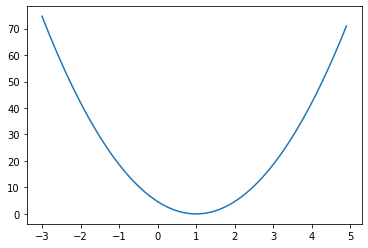

In [15]:
plt.plot(W_val, cost_val)
plt.show()

In [0]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

In [0]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= Learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)  #W값 갱신 op

In [18]:
# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
  sess.run(update, feed_dict={X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.632926 [0.6317243]
1 0.18003221 [0.8035863]
2 0.051209178 [0.895246]
3 0.014566169 [0.9441312]
4 0.0041432814 [0.9702033]
5 0.0011785267 [0.98410845]
6 0.00033522342 [0.9915245]
7 9.535242e-05 [0.99547976]
8 2.7121203e-05 [0.99758923]
9 7.714342e-06 [0.99871427]
10 2.1946053e-06 [0.99931425]
11 6.2422004e-07 [0.99963427]
12 1.7762981e-07 [0.9998049]
13 5.056717e-08 [0.99989593]
14 1.4363703e-08 [0.9999445]
15 4.0987764e-09 [0.9999704]
16 1.1661676e-09 [0.9999842]
17 3.3061673e-10 [0.9999916]
18 9.2727014e-11 [0.9999955]
19 2.6526928e-11 [0.9999976]
20 7.461883e-12 [0.99999875]


In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
  cost_val, W_val, _ = sess.run([cost, W, update], feed_dict={X: x_data, Y: y_data})
  print(step, cost_val, W_val)

0 22.088074 [-0.1603105]
1 6.2828293 [0.3811677]
2 1.7871157 [0.6699561]
3 0.50833535 [0.8239766]
4 0.14459313 [0.90612084]
5 0.04112871 [0.9499311]
6 0.011698854 [0.9732966]
7 0.003327675 [0.9857582]
8 0.0009465401 [0.9924044]
9 0.00026923546 [0.99594903]
10 7.658167e-05 [0.9978395]
11 2.1782413e-05 [0.9988477]
12 6.1961305e-06 [0.9993855]
13 1.7621716e-06 [0.99967223]
14 5.013033e-07 [0.9998252]
15 1.4264435e-07 [0.9999068]
16 4.0554635e-08 [0.9999503]
17 1.1543709e-08 [0.9999735]
18 3.286285e-09 [0.9999859]
19 9.329296e-10 [0.9999925]
20 2.6142763e-10 [0.999996]


In [20]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

# Our hypothesis for linear model X * W
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10):
  W_val, _ = sess.run([W, train])
  print(step, W_val)

0 1.2666664
1 1.0177778
2 1.0011852
3 1.000079
4 1.0000052
5 1.0000004
6 1.0
7 1.0
8 1.0
9 1.0


## Multi-varable linear regression

H(x) = Wx + b

H(x1,x2,x3) = w1x1 + w2x2 + w3x3 + b

-> Matrix

-> H(X) = XW

In [21]:
# 코드 복잡함 (사용 X)

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  3779.23 
Prediction:
 [211.02502 246.67366 246.6029  267.2102  187.84448]
200 Cost:  10.282494 
Prediction:
 [156.30516 181.38615 182.02332 196.91463 138.14153]
400 Cost:  9.241639 
Prediction:
 [156.0633  181.55182 181.94904 196.86223 138.35779]
600 Cost:  8.307734 
Prediction:
 [155.83418 181.70876 181.87865 196.81267 138.5626 ]
800 Cost:  7.4697633 
Prediction:
 [155.61711 181.8574  181.81197 196.76578 138.75658]
1000 Cost:  6.7178574 
Prediction:
 [155.4115  181.99826 181.7488  196.7214  138.94029]
1200 Cost:  6.043126 
Prediction:
 [155.21666 182.1317  181.68892 196.67943 139.11426]
1400 Cost:  5.437696 
Prediction:
 [155.03209 182.25809 181.63217 196.6397  139.27904]
1600 Cost:  4.894478 
Prediction:
 [154.85722 182.37784 181.57845 196.60216 139.43507]
1800 Cost:  4.407046 
Prediction:
 [154.69156 182.49127 181.5275  196.5666  139.58282]
2000 Cost:  3.9696808 
Prediction:
 [154.5346  182.59872 181.47923 196.53302 139.72276]


In [22]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  45719.477 
Prediction:
 [[337.9183 ]
 [414.6525 ]
 [403.92352]
 [442.52728]
 [316.2815 ]]
200 Cost:  4.0098658 
Prediction:
 [[148.3195 ]
 [186.55103]
 [179.28569]
 [197.87529]
 [142.2658 ]]
400 Cost:  3.7966397 
Prediction:
 [[148.42982]
 [186.47675]
 [179.32121]
 [197.88766]
 [142.17955]]
600 Cost:  3.6035485 
Prediction:
 [[148.53464]
 [186.40627]
 [179.35504]
 [197.8989 ]
 [142.09822]]
800 Cost:  3.4285374 
Prediction:
 [[148.63419]
 [186.33934]
 [179.38724]
 [197.90898]
 [142.02155]]
1000 Cost:  3.2697773 
Prediction:
 [[148.72879]
 [186.27582]
 [179.41791]
 [197.91806]
 [141.94926]]
1200 Cost:  3.1255946 
Prediction:
 [[148.81871]
 [186.21553]
 [179.44716]
 [197.92616]
 [141.88118]]
1400 Cost:  2.994541 
Prediction:
 [[148.90413]
 [186.15826]
 [179.475  ]
 [197.93329]
 [141.817  ]]
1600 Cost:  2.875238 
Prediction:
 [[148.98537]
 [186.1039 ]
 [179.50156]
 [197.93956]
 [141.75659]]
1800 Cost:  2.7665665 
Prediction:
 [[149.06256]
 [186.05226]
 [179.52687]
 [197.94499]
 [1

## Logistic classification

-> linear regresion으로 쓰면 문제가 있음

-> 0과 1로만 분류하기 때문에 아무리 큰 값이 들어와도 y는 1보다 클 수 없음

-> 0 ~ 1 사이로 출력할 수 있는 함수가 필요함

-> sigmoid function (logistic function)

## Cost function

-> linear regression으로 가설을 세웠을 때의 cost function 같이 2차원 모양의 곡선이 아님

-> 울퉁불퉁한 곡선의 형태기 때문에 시작하는 점에 따라서 global minimum이 아니라 local minimum을 찾을 수 있음

-> 따라서 gradient descent algorithm 사용 불가